/home/hduser/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "



pn.extension('plotly')



GridSpec(max_height=800, ncols=3, nrows=3, sizing_mode='stretch_both')
    [0] Column(sizing_mode='stretch_both')
        [0] Markdown(str)
        [1] FloatSlider(end=10, name='Widget 1')
        [2] IntSlider(end=100, name='Widget 2')
    [1] Column(sizing_mode='stretch_both')
        [0] Markdown(str)
        [1] TextInput(name='Widget 3', value='Enter text here')
        [2] Select(name='Widget 4', options=['Option 1', 'Option 2', ...], value='Option 1')
    [2] Row(sizing_mode='stretch_both')
        [0] Markdown(str)
        [1] Matplotlib(Figure)
    [3] Row(sizing_mode='stretch_both')
        [0] Markdown(str)
        [1] Plotly(dict)
    [4] Row(sizing_mode='stretch_both')
        [0] Markdown(str)
        [1] HTML(str)
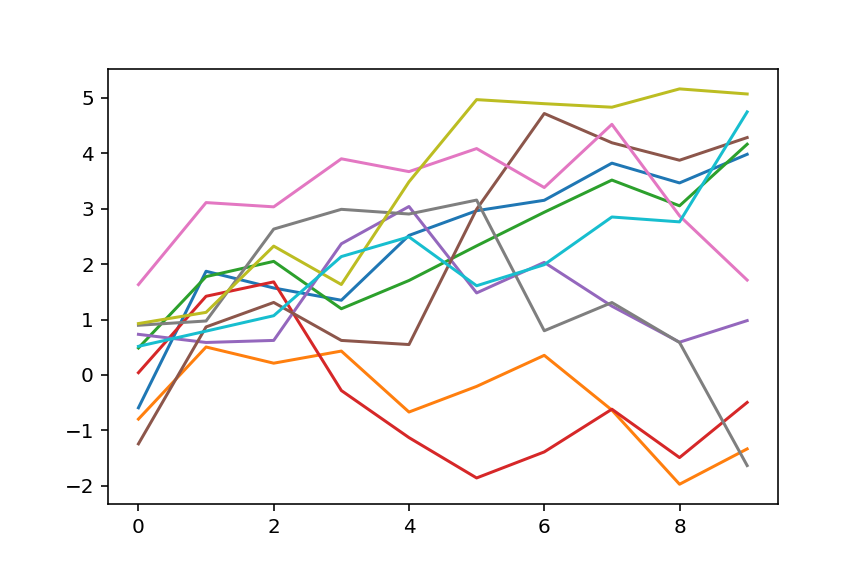

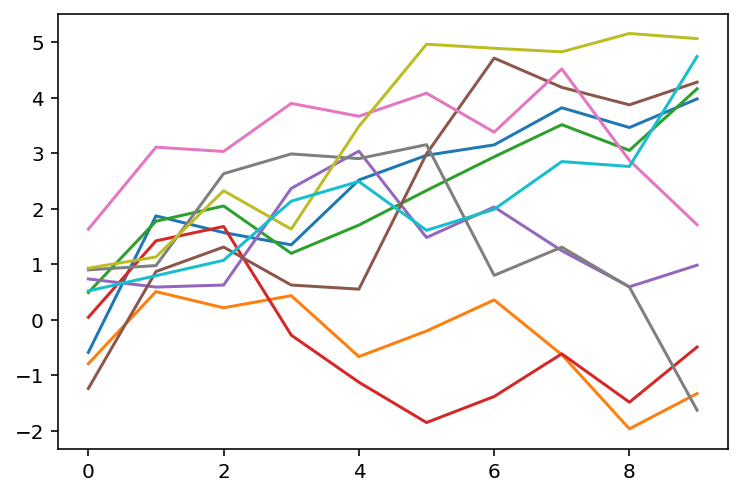

In [1]:
import panel as pn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Panel extension for the notebook
pn.extension()

# Define the widgets and plots
widget1 = pn.widgets.FloatSlider(name='Widget 1', start=0, end=10, step=0.1)
widget2 = pn.widgets.IntSlider(name='Widget 2', start=0, end=100, step=1)
widget3 = pn.widgets.TextInput(name='Widget 3', value='Enter text here')
widget4 = pn.widgets.Select(name='Widget 4', options=['Option 1', 'Option 2', 'Option 3'])

# Matplotlib plot
fig, ax = plt.subplots()
data = np.random.randn(10, 10).cumsum(axis=0)
ax.plot(data)
plot1 = pn.pane.Matplotlib(fig)

# Plotly plot
plot2 = pn.pane.Plotly({'data': [{'y': [1, 2, 1]}], 'layout': {'title': 'Plot 2'}})

# D3JS plot (using HTML)
d3js_code = """
// Your D3JS code goes here
"""
plot3 = pn.pane.HTML(d3js_code)

# Create the panels
panel1 = pn.Column("# Panel 1 (Top Left)", widget1, widget2)
panel2 = pn.Column("# Panel 2 (Top Middle)", widget3, widget4)
panel3 = pn.Row("# Panel 3 (Bottom Left)", plot1)
panel4 = pn.Row("# Panel 4 (Bottom Middle)", plot2)
panel5 = pn.Row("# Panel 5 (Bottom Right)", plot3)

# Combine the panels into a 2x3 grid layout
grid_layout = pn.GridSpec(sizing_mode='stretch_both', max_height=800)
grid_layout[0, 0] = panel1
grid_layout[0, 1] = panel2
grid_layout[1, 0:2] = panel3
grid_layout[2, 0:2] = panel4
grid_layout[1, 2] = panel5

# Serve the layout
grid_layout.servable()
